In [6]:
library(tidyverse)

── Attaching core tidyverse packages ────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ──────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# histogram of the number of gene sets per lib_name

In [2]:
geneset_sz = readr::read_tsv("geneset_sz.tsv")

Rows: 2939 Columns: 3
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): lib_name, descr
dbl (1): num_genes

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
head(geneset_sz)

lib_name,descr,num_genes
<chr>,<chr>,<dbl>
KEGG_2021_Human,ABC transporters,45
KEGG_2021_Human,AGE-RAGE signaling pathway in diabetic complications,100
KEGG_2021_Human,AMPK signaling pathway,120
KEGG_2021_Human,Acute myeloid leukemia,67
KEGG_2021_Human,Adherens junction,71
KEGG_2021_Human,Adipocytokine signaling pathway,69


In [4]:
unique(geneset_sz$lib_name)

[1] "KEGG_2021_Human"        "Reactome_2022"          "WikiPathway_2023_Human"

In [5]:
# Count the number of gene sets per lib_name
gene_set_counts <- geneset_sz %>%
  group_by(lib_name) %>%
  summarise(num_gene_sets = n()) 

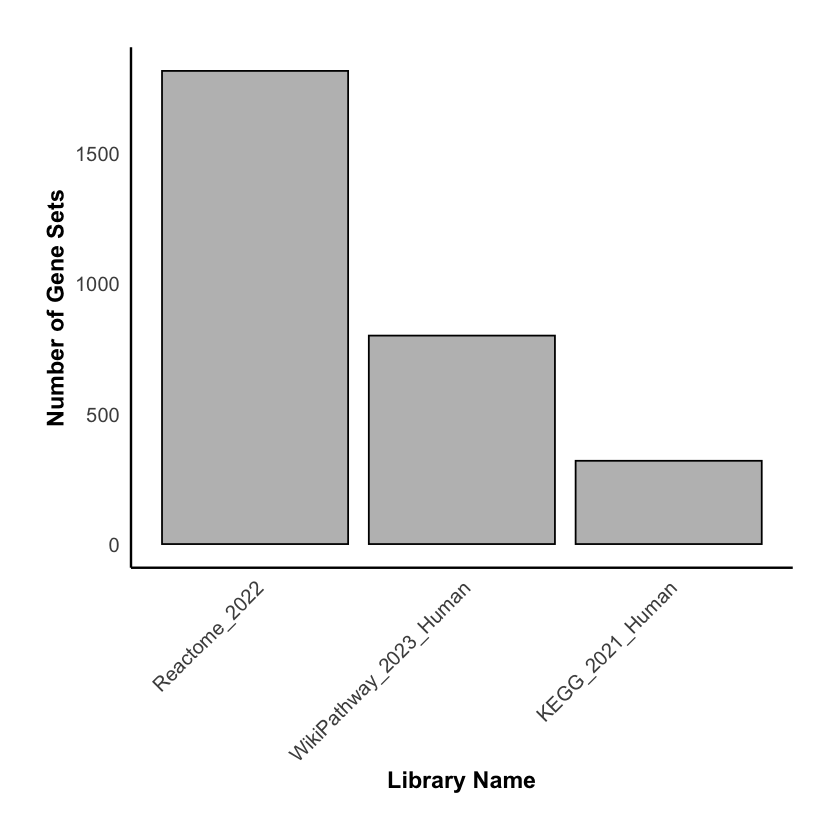

In [6]:
# Create the plot
p <- ggplot(gene_set_counts, aes(x = reorder(lib_name, -num_gene_sets), y = num_gene_sets)) +
  geom_bar(stat = "identity", fill = "grey", color = "black") +
  xlab("Library Name") +
  ylab("Number of Gene Sets") +
  theme_minimal(base_size = 15) + # Minimal theme with a base font size
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(color = "black"), 
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    plot.margin = margin(1, 1, 1, 1, "cm"), # Top, right, bottom, left margins

  ) 
p

In [7]:
ggsave("figures/1_number_of_gene_sets_per_lib.pdf", plot = p, device = "pdf",width = 8, height = 8, dpi = 300)

# boxplot of the number of genes in each gene set for each library

Warning message:
“The dot-dot notation (`..y..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(y)` instead.”


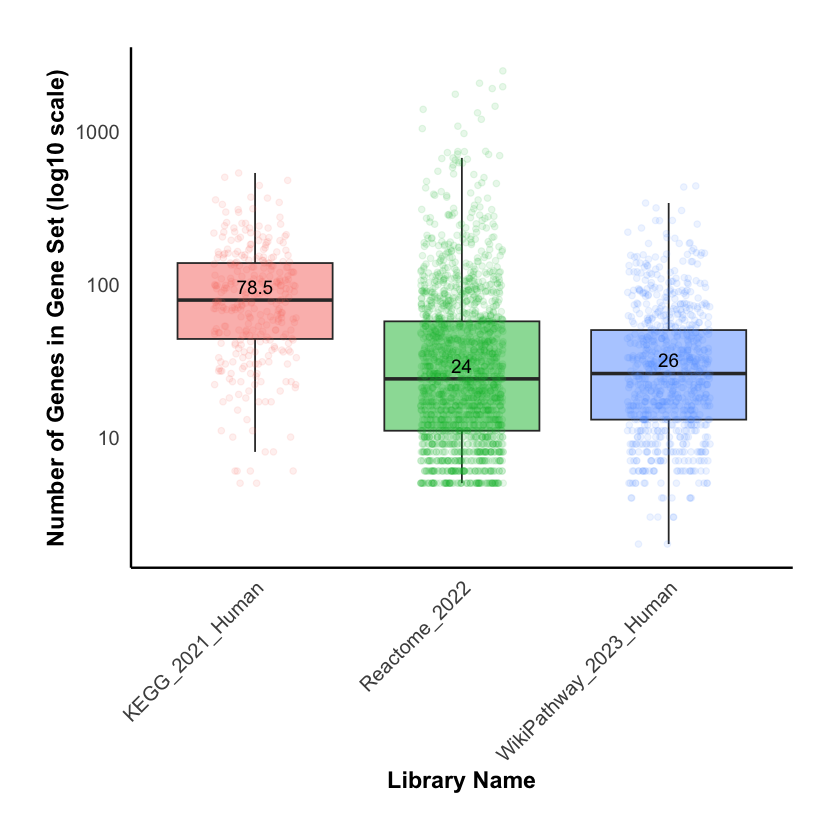

In [8]:
p <- ggplot(geneset_sz, aes(x = lib_name, y = num_genes, fill = lib_name)) +
  geom_boxplot(outlier.shape = NA, alpha = 0.5) +  # Add a boxplot, outlier.shape = NA hides the outliers
  geom_jitter(width = 0.2, alpha = 0.1, aes(color = lib_name)) +  # Add jittered points to show individual data points
  stat_summary(fun = median, geom = "text", aes(label = round(..y.., 1)), vjust = -0.5, color = "black", size = 4) +  # Add median values
  scale_y_log10() +  # Use a logarithmic scale for the y-axis
  xlab("Library Name") +
  ylab("Number of Genes in Gene Set (log10 scale)") +
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    legend.position = "none",
    strip.text = element_text(face = "bold", size = 12),
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )
p

In [9]:
ggsave("figures/3_boxplot_number_of_genes_per_lib.pdf", plot = p, device = "pdf", width = 8, height = 8, dpi = 300)

# Percentage of significant gene sets

In [10]:
df <- readr::read_tsv("genes_overlap.tsv")

Rows: 34512 Columns: 13
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): database, model, gene_set, descr
dbl (9): ncurated, nllm, ninter, generatio, bgratio, non_hgcn, ndup, p_val, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [11]:
head(df)

database,model,gene_set,descr,ncurated,nllm,ninter,generatio,bgratio,non_hgcn,ndup,p_val,p_val_adj
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,ABC transporters,45,13,7,0.5384615,0.002267459,6,0,3.258955e-16,1.042866e-13
KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,AGE-RAGE signaling pathway in diabetic complications,100,69,22,0.3188406,0.005038799,14,0,1.297110e-34,4.150751e-32
KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,AMPK signaling pathway,120,39,13,0.3333333,0.006046559,1,0,5.695660e-20,1.822611e-17
KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,Acute myeloid leukemia,67,20,4,0.2000000,0.003375995,3,0,5.592375e-07,1.789560e-04
KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,Adherens junction,71,20,8,0.4000000,0.003577547,2,0,2.236612e-15,7.157158e-13
KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,Adipocytokine signaling pathway,69,37,23,0.6216216,0.003476771,2,0,2.876419e-49,9.204541e-47


In [12]:
# Compute the percentage of "descr" that has "p_val_adj" < 0.01 for each "database" and "model"
percentage_df <- df %>%
  filter(gene_set == "llm_genes_role") %>%
  group_by(database, model) %>%
  summarise(percentage = sum(p_val_adj < 0.01) / n() * 100)

`summarise()` has grouped output by 'database'. You can override using the `.groups` argument.


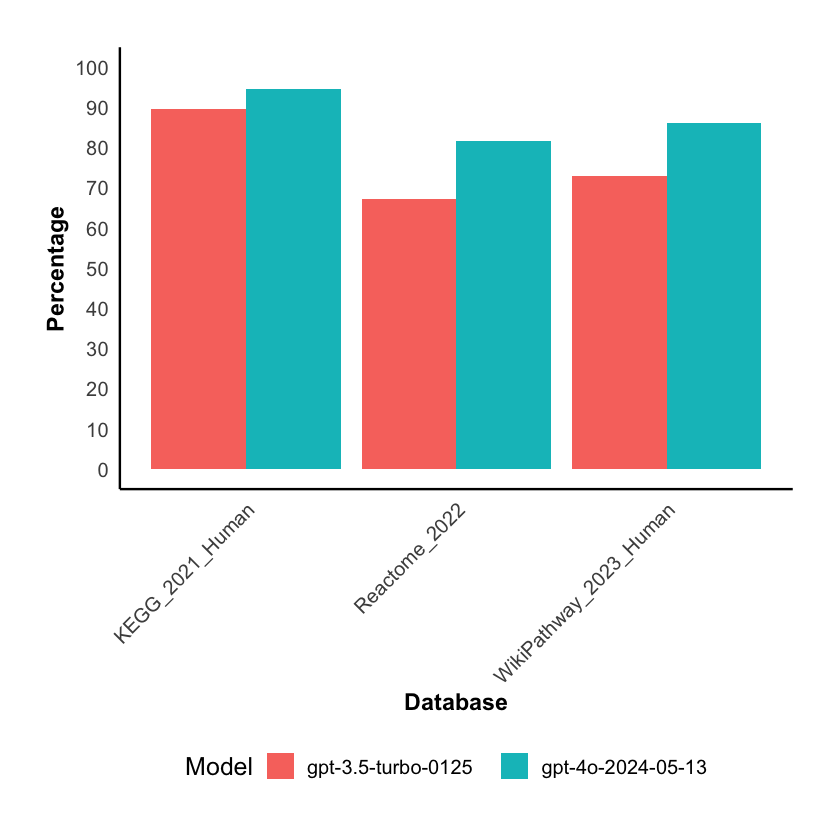

In [13]:
# Create the bar plot
p <- ggplot(percentage_df, aes(x = database, y = percentage, fill = model)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9)) +
  scale_y_continuous(breaks = seq(0, 100, by = 10), limits = c(0, 100))+
  labs(
       x = "Database",
       y = "Percentage",
      fill = "Model") +
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )
p

In [28]:
ggsave("figures/4_percent_sig_compare_models.pdf", plot = p, device = "pdf", width = 10, height = 8, dpi = 300)

# difference between p-values between GPT3 and GPT4
## number of significant gene sets by different p-val threshold

`summarise()` has grouped output by 'database'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'database'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'database'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'database'. You can override using the `.groups` argument.


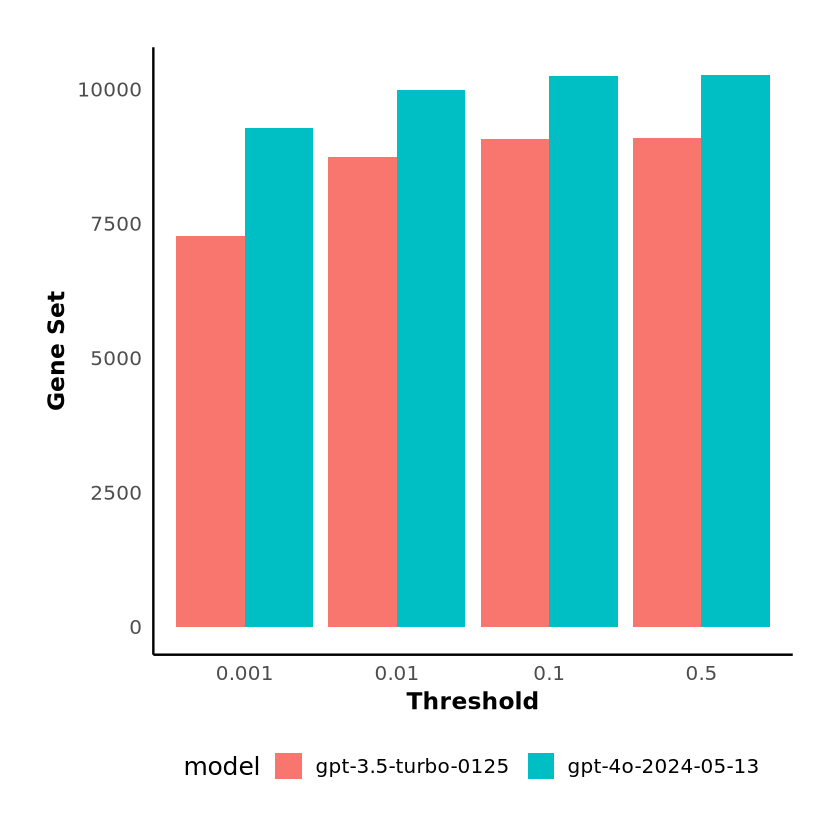

In [6]:
# Read the data
df <- read.csv('genes_overlap.tsv', sep='\t')

# Define p-value thresholds
p_value_thres <- c(0.001, 0.01, 0.1, 0.5)
df_res <- data.frame()

# Loop through each threshold
for (thres in p_value_thres) {
    
    df_thres <- df %>%
        filter(p_val < thres) %>%
        group_by(database, model) %>%
        summarise(gene_set = n()) %>%
        ungroup() %>%
        mutate(thres = thres)
    
    df_res <- bind_rows(df_res, df_thres)
}

# Plotting
ggplot(df_res, aes(x = factor(thres), y = gene_set, fill = model)) +
    geom_bar(stat = "identity", position = "dodge") +
    labs(
         x = "Threshold",
         y = "Gene Set") +
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )

# how many gene sets where n_tries > 1 (fraction)


In [19]:
df <- read.csv('genes_overlap.tsv', sep='\t')

In [20]:
head(df)

,database,model,gene_set,descr,ncurated,nllm,ninter,generatio,bgratio,non_hgcn,ntries,ndup,p_val,p_val_adj
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
1,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,ABC transporters,45,13,7,0.5384615,0.002267459,6,1,0,3.258955e-16,1.042866e-13
2,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,AGE-RAGE signaling pathway in diabetic complications,100,69,22,0.3188406,0.005038799,14,1,0,1.297110e-34,4.150751e-32
3,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,AMPK signaling pathway,120,39,13,0.3333333,0.006046559,1,1,0,5.695660e-20,1.822611e-17
4,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,Acute myeloid leukemia,67,20,4,0.2000000,0.003375995,3,1,0,5.592375e-07,1.789560e-04
5,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,Adherens junction,71,20,8,0.4000000,0.003577547,2,1,0,2.236612e-15,7.157158e-13
6,KEGG_2021_Human,gpt-3.5-turbo-0125,llm_genes_role,Adipocytokine signaling pathway,69,37,23,0.6216216,0.003476771,2,1,0,2.876419e-49,9.204541e-47


In [52]:
# Compute the percentage of "descr" that has more than 1 try
percentage_df <- df %>%
  filter(gene_set == "llm_genes_role") %>%
  group_by(database, model) %>%
  summarise(percentage = sum(ntries > 1)/n()*100,
           count = sum(ntries > 1), .groups = 'drop')

In [53]:
percentage_df

database,model,percentage,count
<chr>,<chr>,<dbl>,<int>
KEGG_2021_Human,gpt-3.5-turbo-0125,0.31250000,1
KEGG_2021_Human,gpt-4o-2024-05-13,0.00000000,0
Reactome_2022,gpt-3.5-turbo-0125,0.11025358,2
Reactome_2022,gpt-4o-2024-05-13,0.05512679,1
WikiPathway_2023_Human,gpt-3.5-turbo-0125,0.00000000,0
WikiPathway_2023_Human,gpt-4o-2024-05-13,0.00000000,0


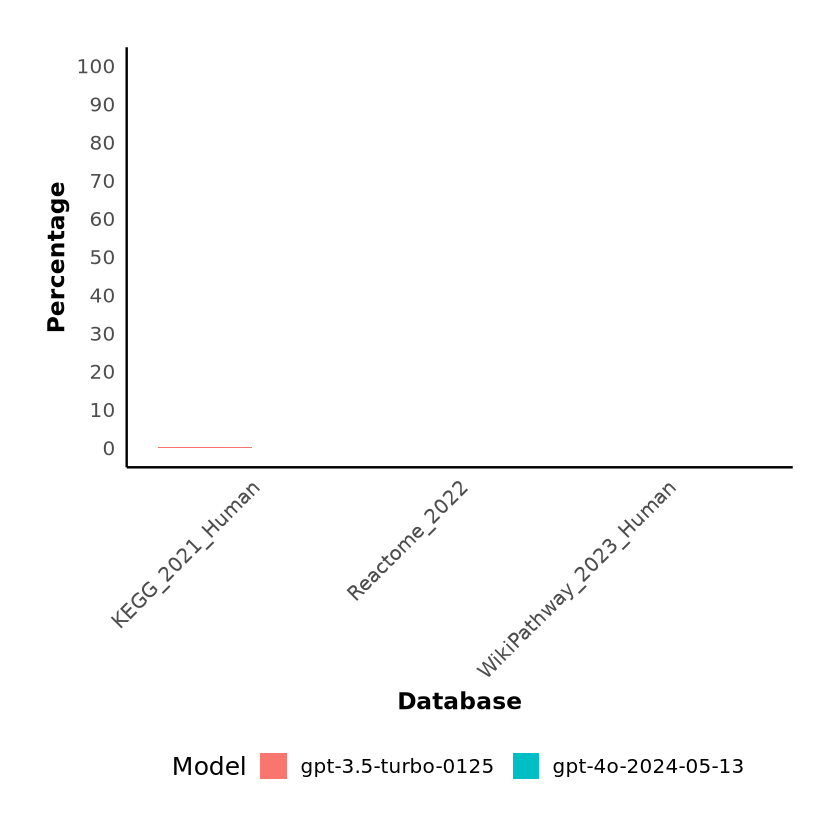

In [54]:
# Create the bar plot
p <- ggplot(percentage_df, aes(x = database, y = percentage, fill = model)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9)) +
  scale_y_continuous(breaks = seq(0, 100, by = 10), limits = c(0, 100))+
  labs(
       x = "Database",
       y = "Percentage",
      fill = "Model") +
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )
p

# Fraction of genes returned that were not HGNC genes. 

In [16]:
df <- read.csv('genes_overlap.tsv', sep='\t')

In [24]:
# Compute the percentage of "descr" that is not HGNC genes, formula non_hgcn/nllm
percentage_df <- df %>%
  filter(gene_set == "llm_genes_role") %>%
  group_by(database, model) %>%
  summarise(percentage = sum(non_hgcn) / sum(nllm) * 100,.groups = 'drop')

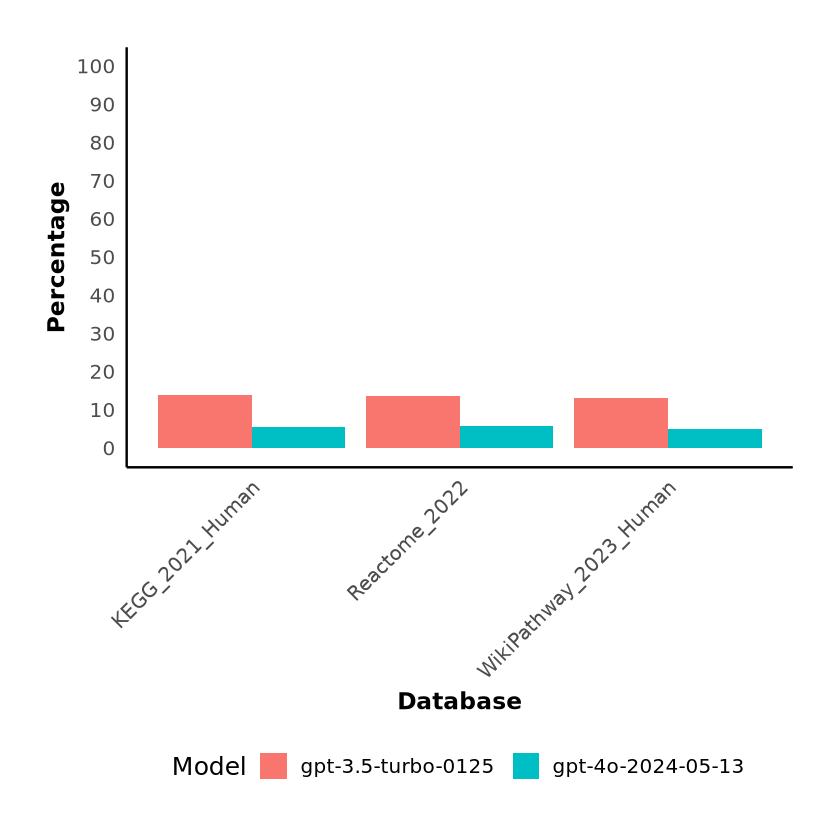

In [18]:
# Create the bar plot
p <- ggplot(percentage_df, aes(x = database, y = percentage, fill = model)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9)) +
  scale_y_continuous(breaks = seq(0, 100, by = 10), limits = c(0, 100))+
  labs(
       x = "Database",
       y = "Percentage",
      fill = "Model") +
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )
p

# how many gene sets with duplicate genes (and maybe how many?)